# Investigating Fandango Movie Ratings

+ **What the project is about?**  
In this project we are going to analyse the fandango movie rating to see if the movie ratings are still inflated, after it was once discovered by Walt Hickey(in 2015) that they inflate movie ratings.  

+ **What your goal is in this project?**  
The goal is to investigate and find weather fandango still inflates movie ratings (which implies that they made a false statement in 2015 saying it was a bug which inflated the movie ratings) or the ratings are normal.

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy
import seaborn as sns

In [9]:
df_before = pd.read_csv("fandango_score_comparison.csv")
df_after = pd.read_csv("movie_ratings_16_17.csv")

In [10]:
df_before.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [11]:
df_after.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [12]:
fandango_before = df_before[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()

In [13]:
fandango_after = df_after[['movie', 'year', 'fandango']].copy()

In [23]:
fandango_after = fandango_after[fandango_after['year']==2016]

Since the data was subjectively sampled, it does not represents the population, if analysis were to be done on this data we will probably reach at an incorrect conclusion--therefore we either need to re-collect the data with random sampling or we need to tweak the goal slightly so the data becomes relevent.  
We will go with the later as it is easier and also because the first approach is now impossible as we can't re-collect data from the 2015.

## New Goal
The new goal is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016. This new goal should also be a fairly good proxy for our initial goal.

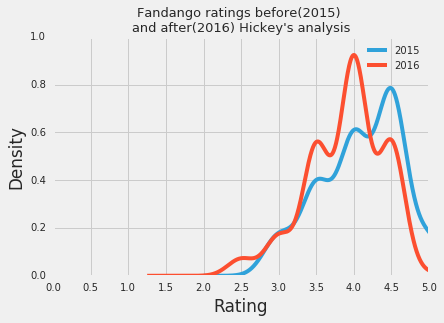

In [53]:
%matplotlib inline
plt.style.use('fivethirtyeight')
fandango_before["Fandango_Stars"].plot.kde(label="2015")
fandango_after["fandango"].plot.kde(label="2016")
plt.title("Fandango ratings before(2015) \nand after(2016) Hickey's analysis", fontdict={
    "fontsize":13
})
plt.xlabel("Rating")
plt.xlim(0, 5)
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.legend()
plt.show()

- **What is the shape of each distribution?**  
Both the plots are highly left skewed.  
- **How do their shapes compare?**  
Although mostly similar, but the 2015 plot is more left skewed showing that the ratings were more inflated.  
- **Can we see any evidence on the graph that suggests that there is indeed a change between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016?**  
Yes, it is clearly visible that the rating went a bit down after 2015 as the 2016 plot is a bit shifted to the left.  
- **Provided there's a difference, can we tell anything about the direction of the difference? In other words, were movies in 2016 rated lower or higher compared to 2015?**  
The movies were rated lower in 2016 as compared to 2015.

In [90]:
fandango_before["Fandango_Stars"].value_counts(normalize=True).sort_index()*100

3.0     8.219178
3.5    18.493151
4.0    28.082192
4.5    37.671233
5.0     7.534247
Name: Fandango_Stars, dtype: float64

In [91]:
fandango_after["fandango"].value_counts(normalize=True).sort_index()*100

2.5     3.141361
3.0     7.329843
3.5    24.083770
4.0    40.314136
4.5    24.607330
5.0     0.523560
Name: fandango, dtype: float64

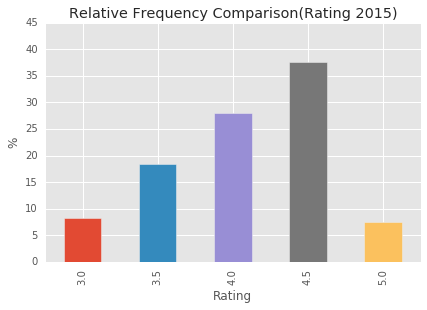

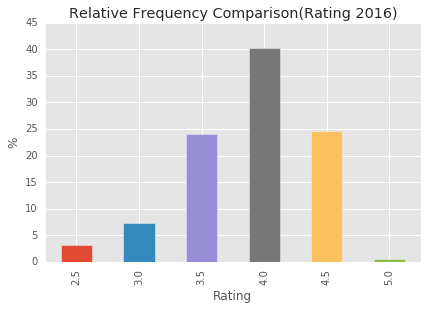

In [88]:
(fandango_before["Fandango_Stars"].value_counts(normalize=True).sort_index()*100).plot.bar(title="Relative Frequency Comparison(Rating 2015)")
plt.xlabel("Rating")
plt.ylabel("%")
plt.ylim(0, 45)
plt.show()
(fandango_after["fandango"].value_counts(normalize=True).sort_index()*100).plot.bar(title="Relative Frequency Comparison(Rating 2016)")
plt.xlabel("Rating")
plt.ylabel("%")
plt.show()

From the above plots we can clearly tell there is a difference in the plots but it is hard to tell weather the rating has gone up or down.

In [103]:
mean2015 = fandango_before['Fandango_Stars'].mean()
median2015 = fandango_before['Fandango_Stars'].median()
mode2015 = fandango_before['Fandango_Stars'].mode()[0]

In [104]:
mean2016 = fandango_after['fandango'].mean()
median2016 = fandango_after['fandango'].median()
mode2016 = fandango_after['fandango'].mode()[0]`

In [106]:
summary_stats = pd.DataFrame()
summary_stats['2015'] = [mean2015, median2015, mode2015]
summary_stats['2016'] = [mean2016, median2016, mode2016]
summary_stats.index = ["mean", "median", "mode"]

In [107]:
summary_stats

,2015,2016
mean,4.089041,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


In [111]:
magnitude_change = summary_stats['2016'] - summary_stats['2015']
percentage_change = ((summary_stats['2016'] - summary_stats['2015']) / summary_stats['2015'])*100

In [110]:
percentage_change

mean      -4.930411
median     0.000000
mode     -11.111111
dtype: float64

In [112]:
magnitude_change

mean     -0.201607
median    0.000000
mode     -0.500000
dtype: float64

In [113]:
summary_stats

,2015,2016
mean,4.089041,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


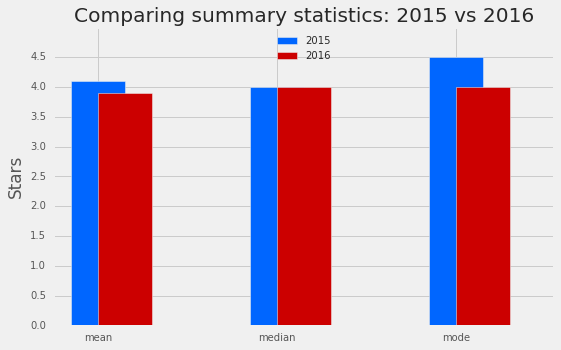

In [150]:
plt.style.use('fivethirtyeight')
plt.title("Comparing summary statistics: 2015 vs 2016")
summary_stats["2015"].plot.bar(color="#0066FF",align='center', label="2015", width=0.3)
summary_stats["2016"].plot.bar(color="#CC0000",align='edge', label="2016", width=0.3, rot=0, figsize=(8, 5))
plt.ylim(0, 5.0)
plt.yticks(numpy.arange(0.0, 5.0, 0.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

* **The mean rating decreased by almost 5%**

# Conclusions  
+ From our analysis this is clear that, indeed there is a difference btw the fandango 2015 rating and fandango 2016 ratings.At last we also found out that the mean rating decreased by 5% for the popular movies.  
+ This can very well be the result of fandango fixing the biased rating system after the Hickey's analysis.